https://machinelearningmastery.com/how-to-load-and-manipulate-images-for-deep-learning-in-python-with-pil-pillow/

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import image

import torch
import os

from PIL import Image, ImageOps



uint8
(783, 800, 3)


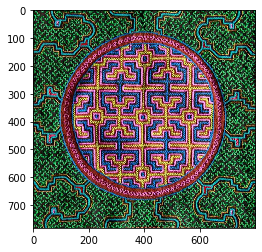

In [3]:



# load image as pixel array
data = image.imread('assets/00000006.jpg')
# summarize shape of the pixel array
print(data.dtype)
print(data.shape)
# display the array of pixels as an image
plt.imshow(data)
plt.show()

(800, 783)
(64, 62)


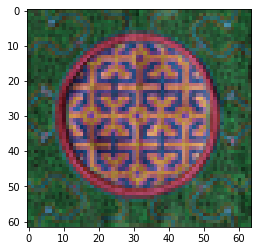

In [28]:
#example resize of the image

img = Image.open('assets/00000006.jpg')

print(img.size)
plt.imshow(img)
#resizes image while preserving aspect ratio
img.thumbnail((64,64),Image.ANTIALIAS)
print(img.size)
plt.imshow(img)



(800, 783)
(64, 64)


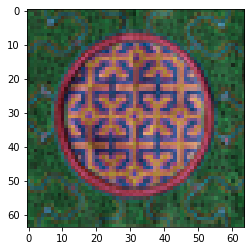

In [29]:
img = Image.open('assets/00000006.jpg')

print(img.size)
plt.imshow(img)
#resizes image while preserving end dimensions
resized = img.resize((64,64),Image.ANTIALIAS)
print(resized.size)
plt.imshow(resized)


We can see here that resizing the image while keeping the aspect ratio is ideal. The second example where the final size was enforced lead to very poor final image quality. The best option is to use the first function (thumbnail) and to pad the image with black borders after to adjust the size accordingly.

### running the image pre processing pipeline

As a first proof of concept, we will use images which are 128x128 pixels in dimensions, The dataset which we collected contains images of all sizes and aspect ratios. There are a few ways that we could go about preparing the data so that it can be read by the CNN.

1) Image resizing
    The resizing of the images will be an important factor in this project as we are trying to stay with the original aesthetic of the collected data. Deviations from the highly geometrical patterns will only cause us trouble during learning (as not all the images will be deformed in the same way) and leave us with desireble performance.
    
    As shown above, the best way to resize the images is by keeping their original aspect ratio. 

https://jdhao.github.io/2017/11/06/resize-image-to-square-with-padding/

0


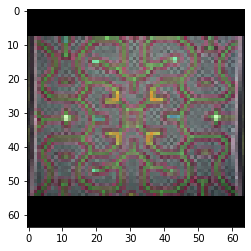

1


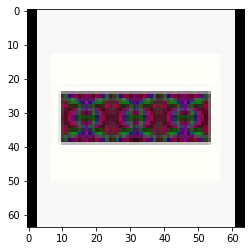

2


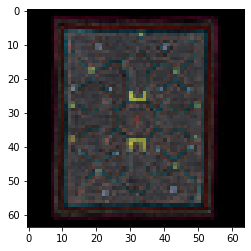

3


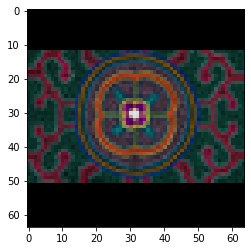

4


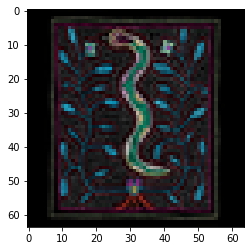

5


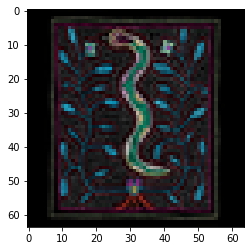

6


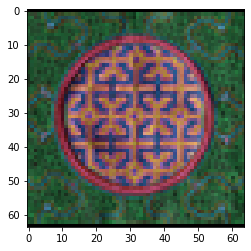

7


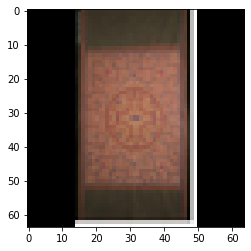

8


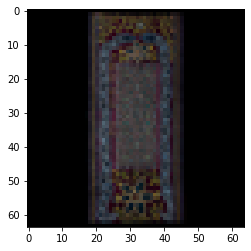

9


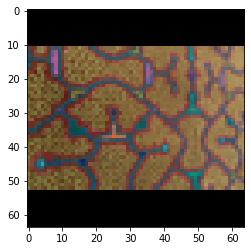

10


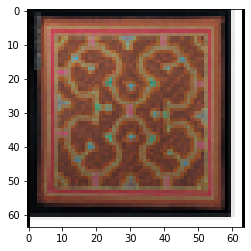

11


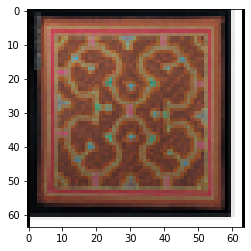

12


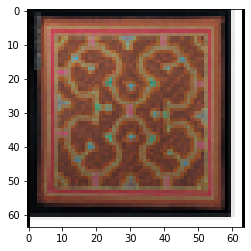

13


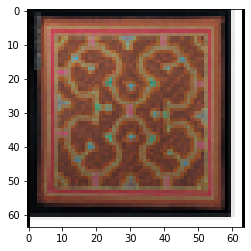

14


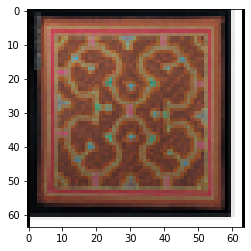

15


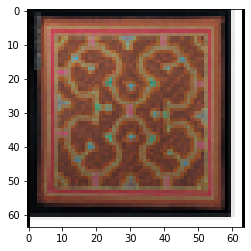

16


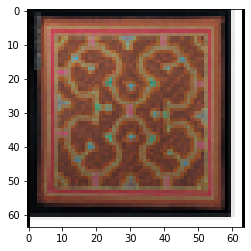

17


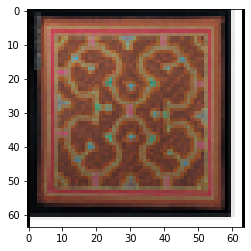

18


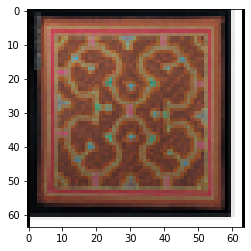

19


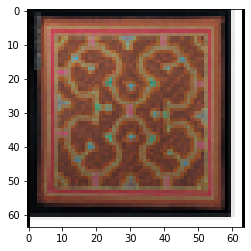

20


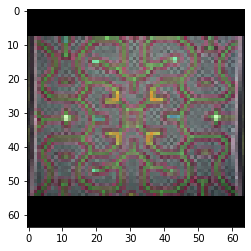

21


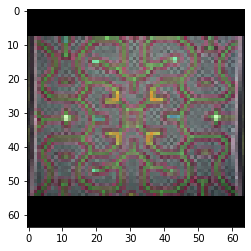

22


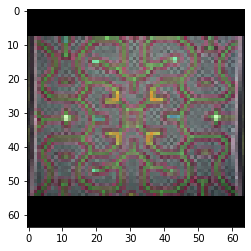

23


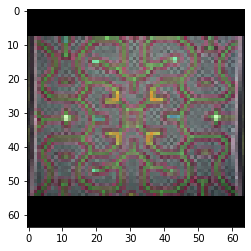

24


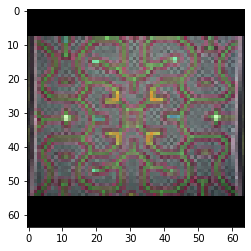

In [34]:

desired_size = 64

for i in range(25):
    
    lead_zeros = "0000000"
    if i %10 == 0:
        lead_zeros = lead_zeros[:-1]
        
    n_str = "assets/"+lead_zeros+str(i)+".jpg" 
    im_pth = n_str
    
    try:
        im = Image.open(im_pth)
    except Exception:
        next
        
    old_size = im.size  # old_size[0] is in (width, height) format

    ratio = float(desired_size)/max(old_size)
    new_size = tuple([int(x*ratio) for x in old_size])
    # use thumbnail() or resize() method to resize the input image

    # thumbnail is a in-place operation

    # im.thumbnail(new_size, Image.ANTIALIAS)

    im = im.resize(new_size, Image.ANTIALIAS)
    # create a new image and paste the resized on it

    new_im = Image.new("RGB", (desired_size, desired_size))
    new_im.paste(im, ((desired_size-new_size[0])//2,
                    (desired_size-new_size[1])//2))


    delta_w = desired_size - new_size[0]
    delta_h = desired_size - new_size[1]
    padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
    new_im = ImageOps.expand(im, padding)


    print(i)
    plt.imshow(new_im)
    plt.show()
    

In [33]:
def basic_preprocess(img_path,desired_size=128):
    
    with Image.open(img_path) as im:
        
        im = im.convert('RGB')
        old_size = im.size  # old_size[0] is in (width, height) format

        ratio = float(desired_size)/max(old_size)
        new_size = tuple([int(x*ratio) for x in old_size])
        # use thumbnail() or resize() method to resize the input image

        # thumbnail is a in-place operation

        # im.thumbnail(new_size, Image.ANTIALIAS)

        im = im.resize(new_size, Image.ANTIALIAS)
        # create a new image and paste the resized on it

        new_im = Image.new("RGB", (desired_size, desired_size))
        new_im.paste(im, ((desired_size-new_size[0])//2,
                        (desired_size-new_size[1])//2))


        delta_w = desired_size - new_size[0]
        delta_h = desired_size - new_size[1]
        padding = (delta_w//2, delta_h//2, delta_w-(delta_w//2), delta_h-(delta_h//2))
        new_im = ImageOps.expand(im, padding)

        return new_im

https://stackoverflow.com/questions/19303621/why-is-the-quality-of-jpeg-images-produced-by-pil-so-poor

In [40]:

destination_dir = 'assets/preproc/32/'

start_dir = "assets/"

for i,file in enumerate(os.listdir(start_dir)):
    if '.jpeg' in file or '.jpg' in file:
        processed_im = basic_preprocess(start_dir+file,32)
        
        
        processed_im.save(destination_dir + file, "JPEG", subsampling=0, quality=100)
        

https://datascience.stackexchange.com/questions/27574/tips-tricks-on-training-dcgan-on-small-dataset